# Facebook Prophet

In [112]:
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplt
warnings.filterwarnings("ignore")

In [113]:
data=pd.read_csv('wiki_machine_learning.csv', sep=' ')
df=data.copy()
df

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning
...,...,...,...,...,...,...,...
382,2016-01-16,1644,en,Machine_learning,8708,201601,Machine_learning
381,2016-01-17,1836,en,Machine_learning,8708,201601,Machine_learning
376,2016-01-18,2983,en,Machine_learning,8708,201601,Machine_learning
375,2016-01-19,3389,en,Machine_learning,8708,201601,Machine_learning


In [114]:
df=df.loc[:,['date','count']]
df

,date,count
81,2015-01-01,1414
80,2015-01-02,1920
79,2015-01-03,1338
78,2015-01-04,1404
77,2015-01-05,2264
...,...,...
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 81 to 372
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    384 non-null    object
 1   count   384 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.0+ KB


In [116]:
df[df['count']==0]

,date,count
104,2015-02-05,0


In [117]:
df=df.drop(104)
df

,date,count
81,2015-01-01,1414
80,2015-01-02,1920
79,2015-01-03,1338
78,2015-01-04,1404
77,2015-01-05,2264
...,...,...
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389


In [118]:
df.date = pd.to_datetime(df.date)

In [119]:
df=df.reset_index().drop('index', axis=1).set_index('date')
df

,count
date,
2015-01-01,1414
2015-01-02,1920
2015-01-03,1338
2015-01-04,1404
2015-01-05,2264
...,...
2016-01-16,1644
2016-01-17,1836
2016-01-18,2983


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 383 entries, 2015-01-01 to 2016-01-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   383 non-null    int64
dtypes: int64(1)
memory usage: 6.0 KB


In [122]:
y=df['count']
y

date
2015-01-01    1414
2015-01-02    1920
2015-01-03    1338
2015-01-04    1404
2015-01-05    2264
              ... 
2016-01-16    1644
2016-01-17    1836
2016-01-18    2983
2016-01-19    3389
2016-01-20    3559
Name: count, Length: 383, dtype: int64

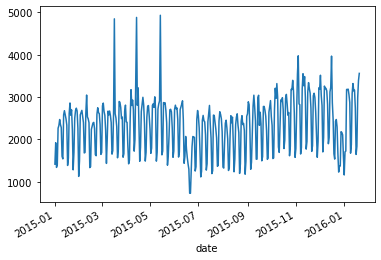

In [123]:
y.plot()
pyplt.show()

In [124]:
df=df.reset_index()
df

,date,count
0,2015-01-01,1414
1,2015-01-02,1920
2,2015-01-03,1338
3,2015-01-04,1404
4,2015-01-05,2264
...,...,...
378,2016-01-16,1644
379,2016-01-17,1836
380,2016-01-18,2983
381,2016-01-19,3389


In [125]:
from fbprophet import Prophet

In [126]:
m=Prophet()

In [127]:
df.rename(columns={'date':'ds','count':'y'},inplace=True)

In [128]:
df

,ds,y
0,2015-01-01,1414
1,2015-01-02,1920
2,2015-01-03,1338
3,2015-01-04,1404
4,2015-01-05,2264
...,...,...
378,2016-01-16,1644
379,2016-01-17,1836
380,2016-01-18,2983
381,2016-01-19,3389


In [129]:
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [130]:
future=m.make_future_dataframe(periods=30)
future

,ds
0,2015-01-01
1,2015-01-02
2,2015-01-03
3,2015-01-04
4,2015-01-05
...,...
408,2016-02-15
409,2016-02-16
410,2016-02-17
411,2016-02-18


In [131]:
forecast=m.predict(future)
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
408,2016-02-15,2661.272843,2480.201315,3425.823189,2645.776043,2674.663153,302.117812,302.117812,302.117812,302.117812,302.117812,302.117812,0.0,0.0,0.0,2963.390654
409,2016-02-16,2662.899065,2754.199918,3651.514209,2646.336780,2677.180749,539.005014,539.005014,539.005014,539.005014,539.005014,539.005014,0.0,0.0,0.0,3201.904079
410,2016-02-17,2664.525288,2629.061252,3567.315554,2646.823569,2679.589277,429.949459,429.949459,429.949459,429.949459,429.949459,429.949459,0.0,0.0,0.0,3094.474747
411,2016-02-18,2666.151510,2501.889406,3418.988353,2647.035707,2682.306116,306.709935,306.709935,306.709935,306.709935,306.709935,306.709935,0.0,0.0,0.0,2972.861445
412,2016-02-19,2667.777733,2165.280237,3123.706543,2647.512856,2684.874745,-15.955706,-15.955706,-15.955706,-15.955706,-15.955706,-15.955706,0.0,0.0,0.0,2651.822027


<Figure size 1296x432 with 0 Axes>

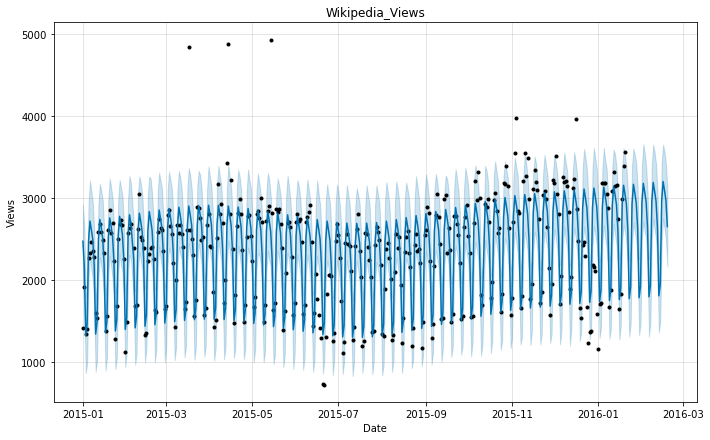

In [147]:
plt.figure(figsize=(18, 6))
m.plot(forecast, xlabel = 'Date', ylabel = 'Views')
plt.title('Wikipedia_Views');

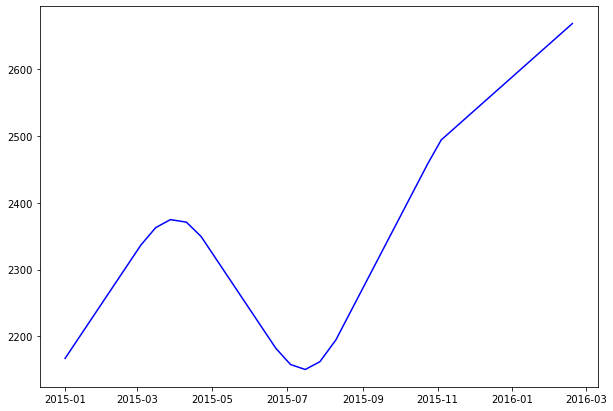

In [148]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['ds'], forecast['trend'],color='blue')

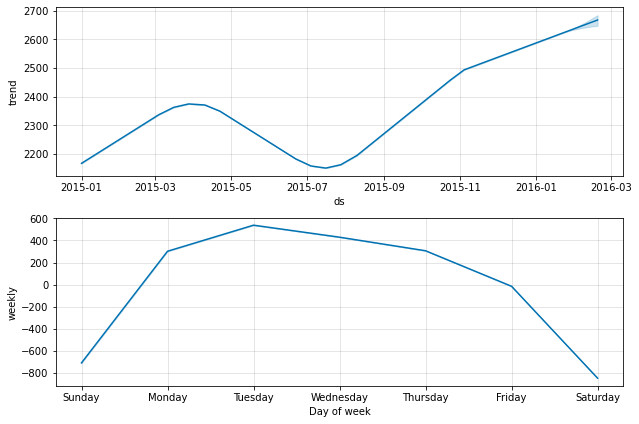

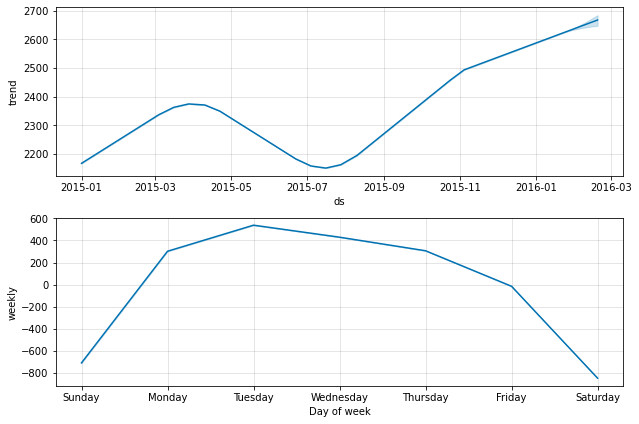

In [149]:
m.plot_components(forecast)

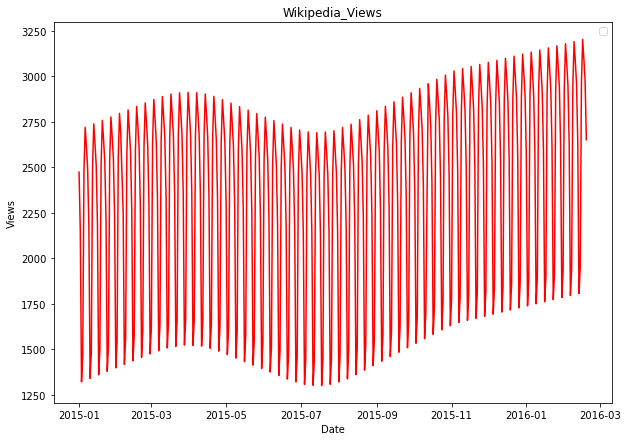

In [150]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['ds'], forecast['yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Views')
plt.title('Wikipedia_Views');